In [1]:
import matplotlib as plt


from perlin_noise import PerlinNoise
import matplotlib.pyplot as plt

import open3d as o3d
import numpy as np
import torch

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [30]:
''''
def GenerateNoiseMap(width, height, scale = 10):
    noiseMap = [width][height]
    
    if (scale <= 0):
        scale = 0.0001

    for y in range (height):
        for x in range (width):
            sampleX = x / scale
            sampleY = y / scale

            #perlinValue = Mathf.PerlinNoise (sampleX, sampleY)
            #noiseMap [x, y] = perlinValue

    return noiseMap


def CreateComplexNoiseMap2D(size, scale, seed=1):
    noise1 = PerlinNoise(octaves=3, seed=seed)
    noise2 = PerlinNoise(octaves=6, seed=seed)
    noise3 = PerlinNoise(octaves=12, seed=seed)
    noise4 = PerlinNoise(octaves=24, seed=seed)

    xpix, ypix = size[0], size[1]
    noisemap = []
    for i in range(xpix):
        row = []
        for j in range(ypix):
            noise_val = noise1([i/xpix, j/ypix])
            noise_val += 0.5 * noise2([i/xpix, j/ypix])
            noise_val += 0.25 * noise3([i/xpix, j/ypix])
            noise_val += 0.125 * noise4([i/xpix, j/ypix])
            #noise_val = noise_val / scale

            row.append(noise_val)
        noisemap.append(row)

    return (np.asarray(noisemap))


def CreateComplexNoiseMap2D(size, scale=1, seed=1):
  octaves = [3, 6, 12, 24]  # Adjust these values as needed
  weights = [1.0, 0.5, 0.25, 0.125]  # Adjust weights for different noise effects

  xpix, ypix = size[0], size[1]
  noisemap = []
  for i in range(xpix):
    row = []
    for j in range(ypix):
      # Adjust coordinates based on zoom (replace with your preferred scaling method)
      sampleX = i / (xpix * scale)
      sampleY = j / (ypix * scale)

      noise_val = 0
      for octave, weight in zip(octaves, weights):
        noise_val += weight * PerlinNoise(octaves=octave, seed=seed)([sampleX, sampleY])

      row.append(noise_val)
    noisemap.append(row)

  return (np.asarray(noisemap))
'''

def CreateComplexNoiseMap2D(size, scale=1, seed=1, texture_map=None):
    octaves = [3, 6, 12, 24]  # Adjust these values as needed
    weights = np.array([1.0, 0.5, 0.25, 0.125])  # Adjust weights for different noise effects

    xpix, ypix = size[0], size[1]
    x = np.linspace(0, 1, xpix) / scale
    y = np.linspace(0, 1, ypix) / scale
    xv, yv = np.meshgrid(x, y, indexing='ij')

    noisemap = np.zeros((xpix, ypix))

    for octave, weight in zip(octaves, weights):
          noise = PerlinNoise(octaves=octave, seed=seed)
          noise_map = np.zeros((xpix, ypix))
          for i in range(xpix):
              for j in range(ypix):
                  noise_map[i, j] = noise([xv[i, j], yv[i, j]])
          noisemap += weight * noise_map

    if texture_map is not None:
      noisemap *= texture_map

    return noisemap

def create_gradient_circle(size):
    xpix, ypix = size
    xv, yv = np.meshgrid(np.linspace(-1, 1, xpix), np.linspace(-1, 1, ypix), indexing='ij')
    gradient_circle = np.sqrt(xv**2 + yv**2)
    gradient_circle = np.clip(1 - gradient_circle, 0, 1)
    return gradient_circle

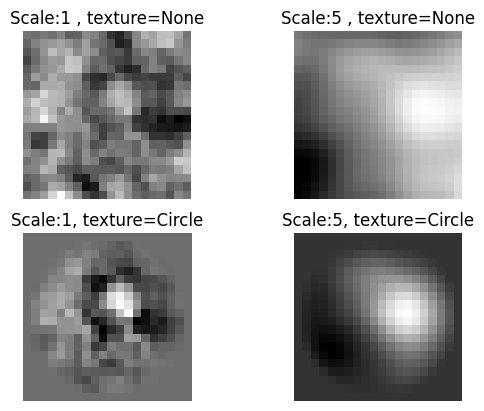

"\nnoiseMap = CreateComplexNoiseMap2D(size, scale=1, seed=10, texture_map=create_gradient_circle(size))\nplt.subplot(2, 2, 2)\nplt.imshow(noiseMap, cmap='gray')\nplt.show()\n\nnoiseMap = CreateComplexNoiseMap2D(size, scale=2, seed=10)\nplt.subplot(2, 2, 3)\nplt.imshow(noiseMap, cmap='gray')\nplt.show()\n\n\nnoiseMap = CreateComplexNoiseMap2D(size, scale=2, seed=10, texture_map=create_gradient_circle(size))\nplt.subplot(2, 2, 4)\nplt.imshow(noiseMap, cmap='gray')\nplt.show()\n"

In [33]:
size = (20,20)

fig, axs = plt.subplots(2, 2)
noiseMap = CreateComplexNoiseMap2D(size, scale=1, seed=10)
axs[0][0].imshow(noiseMap, cmap='gray')
axs[0][0].set_title("Scale:1 , texture=None")
axs[0][0].set_axis_off()

noiseMap = CreateComplexNoiseMap2D(size, scale=10, seed=10)
axs[0][1].imshow(noiseMap, cmap='gray')
axs[0][1].set_title("Scale:5 , texture=None")
axs[0][1].set_axis_off()

noiseMap = CreateComplexNoiseMap2D(size, scale=1, seed=10, texture_map=create_gradient_circle(size))
axs[1][0].imshow(noiseMap, cmap='gray')
axs[1][0].set_title("Scale:1, texture=Circle")
axs[1][0].set_axis_off()

noiseMap = CreateComplexNoiseMap2D(size, scale=10, seed=10, texture_map=create_gradient_circle(size))
axs[1][1].imshow(noiseMap, cmap='gray')
axs[1][1].set_title("Scale:5, texture=Circle")
axs[1][1].set_axis_off()

#axs.set

plt.show()

'''
noiseMap = CreateComplexNoiseMap2D(size, scale=1, seed=10, texture_map=create_gradient_circle(size))
plt.subplot(2, 2, 2)
plt.imshow(noiseMap, cmap='gray')
plt.show()

noiseMap = CreateComplexNoiseMap2D(size, scale=2, seed=10)
plt.subplot(2, 2, 3)
plt.imshow(noiseMap, cmap='gray')
plt.show()


noiseMap = CreateComplexNoiseMap2D(size, scale=2, seed=10, texture_map=create_gradient_circle(size))
plt.subplot(2, 2, 4)
plt.imshow(noiseMap, cmap='gray')
plt.show()
'''

In [2]:
import numpy as np
from scipy import ndimage

import numpy as np

import numpy as np

import numpy as np
from scipy.ndimage import rotate


def extend_noise_map_perlin(noise_map, new_size, seed=1):
  """
  Extends a noise map using Perlin noise to create a complementary extension.

  Args:
      noise_map: A 2D NumPy array representing the original noise map.
      new_size: A tuple (width, height) representing the desired size of the extended map.
      seed: An integer seed for Perlin noise generation (optional).

  Returns:
      A 2D NumPy array representing the extended noise map with a complementary look.
  """

  # Check if original map is compatible (adjust for different sizes if needed)
  if noise_map.shape != (50, 50):
    raise ValueError("Original noise map must have a shape of (50, 50).")

  # Extract original map dimensions
  orig_width, orig_height = noise_map.shape

  # Create the new empty noise map
  extended_map = np.zeros((new_size[1], new_size[0]))

  # Copy the original noise map into the bottom left corner
  extended_map[orig_height:, orig_width:] = noise_map

  # Generate complementary noise using Perlin noise with a twist
  scale = 50  # Controls detail of the generated noise
  octaves = 4  # Number of octaves for Perlin noise
  offset = [orig_width / 2, orig_height / 2]  # Offset for Perlin noise generation

  # Generate noise based on original map with a twist (experiment with different approaches)
  complementary_noise = PerlinNoise(octaves=octaves, seed=seed)(np.mgrid[0:new_size[0]:1j * new_size[0], 0:new_size[1]:1j * new_size[1]] / scale)
  complementary_noise += np.flipud(complementary_noise)  # Mirror vertically for a smoother transition
  complementary_noise = rotate(complementary_noise, 45, reshape=False)  # Rotate for a directional extension

  # Blend the complementary noise with the original map at the edges
  weight = np.linspace(0, 1, orig_width)[np.newaxis, :]  # Create a weight mask for smooth blending
  extended_map[:orig_height, orig_width:] = (1 - weight) * noise_map + weight * complementary_noise[:orig_height, orig_width:]

  weight = np.linspace(0, 1, orig_height)[:, np.newaxis]  # Create another weight mask
  extended_map[orig_height:, :orig_width] = (1 - weight) * noise_map[-orig_height:, :] + weight * complementary_noise[-orig_height:, :]

  # Loop through coordinates for noise generation (adjust loop range)
  for i in range(new_size[0]):
    for j in range(new_size[1]):  # Adjust to new_size[1] - 1
      coords = np.array([i, j]) / scale
      complementary_noise[j, i] = PerlinNoise(octaves=octaves, seed=seed)(coords)


  return complementary_noise


# Example usage
existing_map = CreateComplexNoiseMap2D((50, 50))  # Your existing 50x50 noise map
new_size = (100, 100)  # New size for the extended noise map

fig, axs = plt.subplots(1, 2)
axs[0].imshow(existing_map, cmap='gray')
axs[0].set_title("Existing Noise Map")
axs[0].set_axis_off()


larger_noise_map = extend_noise_map_perlin(existing_map, new_size)

axs[1].imshow(larger_noise_map, cmap='gray')
axs[1].set_title("Extended Noise Map")
axs[1].set_axis_off()


NameError: name 'CreateComplexNoiseMap2D' is not defined

In [ ]:
import JuhaszTestingStuff.ImageToPCD as F3D
import open3d as o3d

geom = F3D.GET_PCD(selected_image="test.jpg")
points = np.asarray(geom[0].points)
print("original point count: ", len(points), " in the shape of: ", points.shape)
print(points[:5])

down_sampled_pcd = geom[0].voxel_down_sample(voxel_size = 0.00005)
ds_points = np.asarray(down_sampled_pcd.points) * 10**5
down_sampled_pcd.points = o3d.utility.Vector3dVector(ds_points)
print("down_sampled point count: ", len(ds_points), " in the shape of: ", ds_points.shape)
print(ds_points[:5])


#o3d.visualization.draw_geometries(geom, window_name="Point Cloud")

#o3d.visualization.draw_geometries([down_sampled_pcd], window_name="Point Cloud down_sampled")



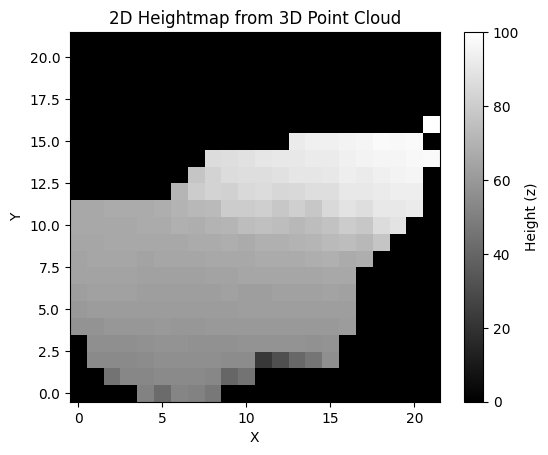

heightmap shape:  (22, 22)  mask shape:  (22, 22)


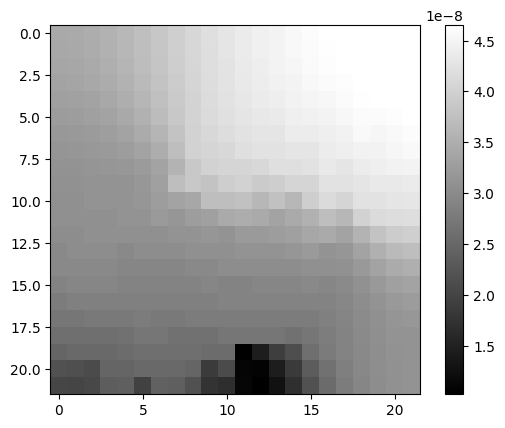

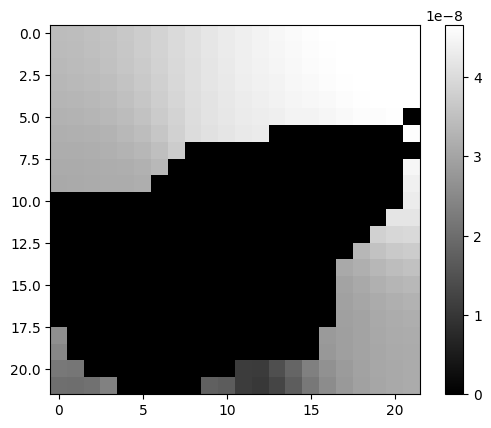

In [3]:
point_cloud = np.asarray(down_sampled_pcd.points)
orig_colors = np.asarray(down_sampled_pcd.colors)

# Define heightmap resolution (adjust as needed)
heightmap_resolution = 5 # Example: 0.1 units per cell

# Calculate grid dimensions
x_min, y_min = np.min(point_cloud[:, :2], axis=0)
x_max, y_max = np.max(point_cloud[:, :2], axis=0)
num_cols = int((x_max - x_min) / heightmap_resolution) + 1

# Ensure a square heightmap by adjusting the number of rows
num_rows = num_cols

# Initialize heightmap
heightmap = np.full((num_rows, num_cols), 0)
colormap = np.full((num_rows, num_cols, 3), (0,0,0))

# Project z-values onto the heightmap
for i in range(len(point_cloud)):
    x, y, z = point_cloud[i]
    row = int((y - y_min) / heightmap_resolution)
    col = int((x - x_min) / heightmap_resolution)
    heightmap[row, col] = z
    colormap[row, col] = orig_colors[i]

# Plot the heightmap
plt.imshow(heightmap, cmap='gray', origin='lower')
plt.colorbar(label='Height (z)')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('2D Heightmap from 3D Point Cloud')
plt.show()





import numpy as np
import matplotlib.pyplot as plt
#from scipy.ndimage import inpaint_biharmonic

from skimage import data
from skimage.morphology import disk, binary_dilation
from skimage.restoration import inpaint

# Identify black pixels (value 0)
mask = heightmap == 0

# Flip the mask vertically before inpainting
#mask = np.flipud(mask)

# Inpaint using biharmonic method
#image_inpainted = inpaint_biharmonic(heightmap, mask, multichannel=False)
print("heightmap shape: ", heightmap.shape, " mask shape: ", mask.shape)
image_result = inpaint.inpaint_biharmonic(heightmap, mask)

image_result_flipped = np.flipud(image_result)

#image_final = np.where(heightmap == 0, image_result, heightmap)

# Display the result
plt.imshow(image_result_flipped, cmap='gray')
plt.colorbar()
plt.show()

heightmap_estimate = np.flipud(np.where(heightmap == 0, image_result, 0))

# Display the result
plt.imshow(heightmap_estimate, cmap='gray')
plt.colorbar()
plt.show()


Project 2D Heightmap Back to 3D

In [4]:
import JuhaszTestingStuff.NoiseGenerator as NG

print("heightmap shape: ", heightmap.shape)
num_of_points = heightmap.shape[0]**2

#projected_pcd = NG.GetPCDfromTextureMap(heightmap, indicy_scale=.5, Z_scale=.1, customColors=True, color_array=np.asarray(down_sampled_pcd.colors[:num_of_points]))
#projected_pcd = NG.GetPCDfromTextureMap(heightmap, indicy_scale=.5, Z_scale=.1, customColors=True, color_array=np.asarray(down_sampled_pcd.colors))

projected_pcd = NG.GetPCDfromTextureMap(heightmap, indicy_scale=.5, Z_scale=.1, customColors=True, color_array=colormap)
projected_estimation_pcd = NG.GetPCDfromTextureMap(heightmap_estimate, indicy_scale=.5, Z_scale=.1, customColors=False)

print("projected colors: ")
print(len(np.asarray(projected_pcd.colors)))
print("----------- ")
print("original colors")
print(len(np.asarray(down_sampled_pcd.colors)))
print("----------- ")

print("projected length: ", len(np.asarray(projected_pcd.points)))

print("down sampled length: ", len(np.asarray(down_sampled_pcd.points)))


#test_colors = np.asarray(projected_pcd.colors)
#test_colors[:10] = (0.62745098039, 0.12549019607, 0.94117647058)
#projected_pcd.colors = o3d.utility.Vector3dVector(test_colors)


#test_colors = np.asarray(down_sampled_pcd.colors)
#test_colors[:10] = (0.62745098039, 0.12549019607, 0.94117647058)
#down_sampled_pcd.colors = o3d.utility.Vector3dVector(test_colors)


o3d.visualization.draw_geometries([projected_pcd, projected_estimation_pcd])

#print(np.asarray(projected_pcd.points)[:100])


heightmap shape:  (22, 22)
normal tensor shape:  (484, 3)
filtered tensor shape:  (242, 3)
color shape1:  (22, 22, 3)
color shape2:  (1452,)
color shape3:  (1, 1452)


RuntimeError: Unable to cast Python instance of type <class 'numpy.ndarray'> to C++ type '?' (#define PYBIND11_DETAILED_ERROR_MESSAGES or compile in debug mode for details)